In [1]:
!pip install pandas

In [2]:
import pandas as pd

In [3]:
!pip install pandas_datareader

In [4]:
import pandas_datareader as pdr
key = "d3714db27b99121d6264b51aa3cc403791fad850"

In [5]:
print(pd.__version__)
print(pdr.__version__)

2.1.4
0.10.0


In [6]:
!pip install yfinance

In [7]:
import yfinance as yf

# Fetch historical market data for Apple (AAPL)
df = yf.download('AAPL', start='1984-09-14', end='2024-09-14')

# Show the data
print(df.head())


[*********************100%***********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
1984-09-14  0.123326  0.127232  0.123326  0.124442   0.095932  246870400
1984-09-17  0.127790  0.129464  0.127790  0.127790   0.098513  192752000
1984-09-18  0.127790  0.128906  0.123326  0.123326   0.095072   97305600
1984-09-19  0.123326  0.124442  0.120536  0.120536   0.092921  106288000
1984-09-20  0.121094  0.122210  0.121094  0.121094   0.093351   66169600


In [8]:
df.to_csv('AAPL.csv')

In [9]:
import pandas as pd

In [10]:
df=pd.read_csv('AAPL.csv')

In [11]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1984-09-14,0.123326,0.127232,0.123326,0.124442,0.095932,246870400
1,1984-09-17,0.127790,0.129464,0.127790,0.127790,0.098513,192752000
2,1984-09-18,0.127790,0.128906,0.123326,0.123326,0.095072,97305600
3,1984-09-19,0.123326,0.124442,0.120536,0.120536,0.092921,106288000
4,1984-09-20,0.121094,0.122210,0.121094,0.121094,0.093351,66169600


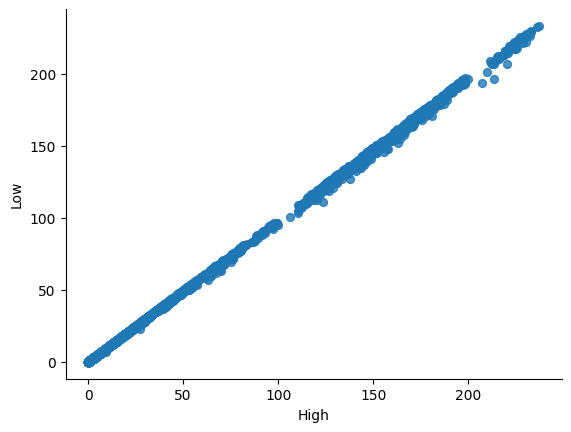

In [12]:
# @title High vs Low

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10075,2024-09-09,220.820007,221.270004,216.710007,220.910004,220.910004,67180000
10076,2024-09-10,218.919998,221.479996,216.729996,220.110001,220.110001,51591000
10077,2024-09-11,221.460007,223.089996,217.889999,222.660004,222.660004,44587100
10078,2024-09-12,222.500000,223.550003,219.820007,222.770004,222.770004,37498200
10079,2024-09-13,223.580002,224.039993,221.910004,222.500000,222.500000,36722900


In [13]:
df1=df.reset_index()['Close']

In [14]:
df1

,Close
0,0.124442
1,0.127790
2,0.123326
3,0.120536
4,0.121094
...,...
10075,220.910004
10076,220.110001
10077,222.660004
10078,222.770004


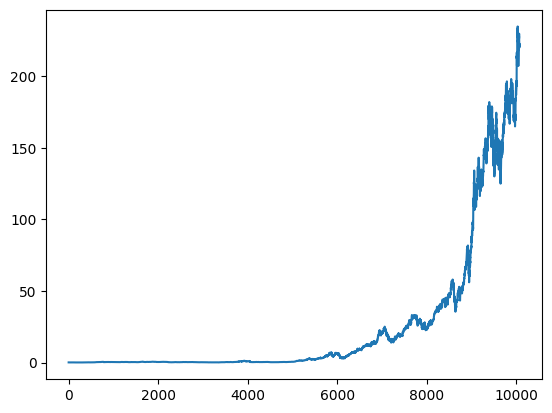

In [15]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [16]:
import numpy as np

In [17]:
df1

,Close
0,0.124442
1,0.127790
2,0.123326
3,0.120536
4,0.121094
...,...
10075,220.910004
10076,220.110001
10077,222.660004
10078,222.770004


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
print(df1)

[[2.54349996e-04]
 [2.68611658e-04]
 [2.49596109e-04]
 ...
 [9.48201361e-01]
 [9.48669937e-01]
 [9.47519785e-01]]


In [20]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [21]:
training_size,test_size

(6552, 3528)

In [22]:
train_data

array([[0.00025435],
       [0.00026861],
       [0.0002496 ],
       ...,
       [0.03808792],
       [0.039092  ],
       [0.03894596]])

In [23]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [24]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [25]:
print(X_train.shape), print(y_train.shape)

(6451, 100)
(6451,)


(None, None)

In [26]:
print(X_test.shape), print(ytest.shape)

(3427, 100)
(3427,)


(None, None)

In [27]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [28]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
# from keras.layers import BatchNormalization

# model = Sequential()
# model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
# model.add(BatchNormalization())  # Add batch normalization
# model.add(LSTM(50, return_sequences=True))
# model.add(BatchNormalization())
# model.add(LSTM(50))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 23s 189ms/step - loss: 4.1557e-05 - val_loss: 0.0079
Epoch 2/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - loss: 6.3068e-07 - val_loss: 0.0070
Epoch 3/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 179ms/step - loss: 6.2632e-07 - val_loss: 0.0043
Epoch 4/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 171ms/step - loss: 6.2301e-07 - val_loss: 0.0053
Epoch 5/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 22s 183ms/step - loss: 5.2988e-07 - val_loss: 0.0046
Epoch 6/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 19s 172ms/step - loss: 5.8039e-07 - val_loss: 0.0031
Epoch 7/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 181ms/step - loss: 5.1495e-07 - val_loss: 0.0038
Epoch 8/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 172ms/step - loss: 5.5242e-07 - val_loss: 0.0028
Epoch 9/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 22s 184ms/step - loss: 5.8737e-07 - val_loss: 0.0024
Epoch 10/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 19s 173ms/step - loss: 3.9240e-07 - val_loss: 0.0013
Epoch 11/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - 

In [45]:
import tensorflow as tf

In [46]:
tf.__version__

'2.17.0'

In [47]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

202/202 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step


In [48]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [49]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2.388688113078447

In [50]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

85.34551941400666

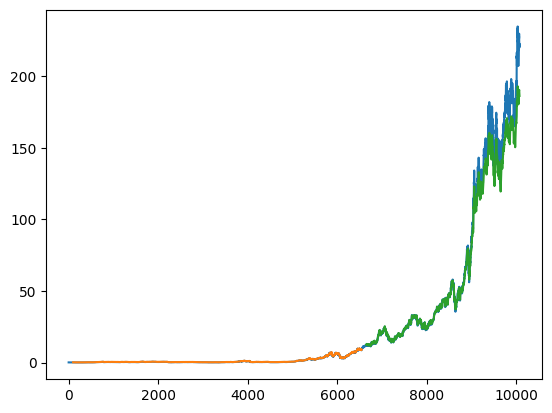

In [51]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [52]:
len(test_data)

3528

In [53]:
x_input=test_data[3428:].reshape(1,-1)
x_input.shape

(1, 100)

In [54]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [55]:
temp_input

[0.7106773710026426,
 0.7197080961825165,
 0.7234140623891835,
 0.7209008224329083,
 0.7387917811874911,
 0.7252883650680008,
 0.7209008224329083,
 0.7367896910531823,
 0.7808781831615343,
 0.7737643998114454,
 0.7767035762864574,
 0.7781519424465381,
 0.7859473022250524,
 0.7794724561524213,
 0.7932314471828947,
 0.7981301396399535,
 0.8078850154005149,
 0.8083961652224814,
 0.8085239526779727,
 0.8135078584382612,
 0.8190881923224511,
 0.8129114953130654,
 0.7957873262901376,
 0.808992528347677,
 0.8090351674986449,
 0.8103130420535605,
 0.8145727972331614,
 0.8186621908050089,
 0.8262445498248021,
 0.8276077026816531,
 0.8340824837555785,
 0.8281614266558812,
 0.838427452238409,
 0.8223681570116759,
 0.8821325169815808,
 0.9073503248436793,
 0.9123342306039679,
 0.9048796590396662,
 0.9226854044910193,
 0.9125471663639833,
 0.8929096923860746,
 0.8835808831416615,
 0.8863496980089197,
 0.8903113041252756,
 0.9081170495766288,
 0.9117378674787717,
 0.8969138726546925,
 0.923026192705

In [56]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.79563206]
101
1 day input [0.7197081  0.72341406 0.72090082 0.73879178 0.72528837 0.72090082
 0.73678969 0.78087818 0.7737644  0.77670358 0.77815194 0.7859473
 0.77947246 0.79323145 0.79813014 0.80788502 0.80839617 0.80852395
 0.81350786 0.81908819 0.8129115  0.79578733 0.80899253 0.80903517
 0.81031304 0.8145728  0.81866219 0.82624455 0.8276077  0.83408248
 0.82816143 0.83842745 0.82236816 0.88213252 0.90735032 0.91233423
 0.90487966 0.9226854  0.91254717 0.89290969 0.88358088 0.8863497
 0.8903113  0.90811705 0.91173787 0.89691387 0.92302619 0.93802055
 0.94347303 0.96387723 0.97018171 0.97384504 0.992162   0.96911677
 0.98176819 0.99821085 1.         0.97469704 0.95467614 0.95522993
 0.95373906 0.95821175 0.93065113 0.92617843 0.92818053 0.92937325
 0.9317587  0.9457307  0.9298844  0.93627403 0.89116324 0.88247331
 0.89350612 0.90837262 0.92085374 0.9263488  0.9422803  0.94419718
 0.95697645 0.96264193 0.96196035 0.96460138 0.9641328  0.95616708
 0.96600711 0.96745541 0.97107623 0

In [57]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [58]:
import matplotlib.pyplot as plt

In [59]:
len(df1)

10080

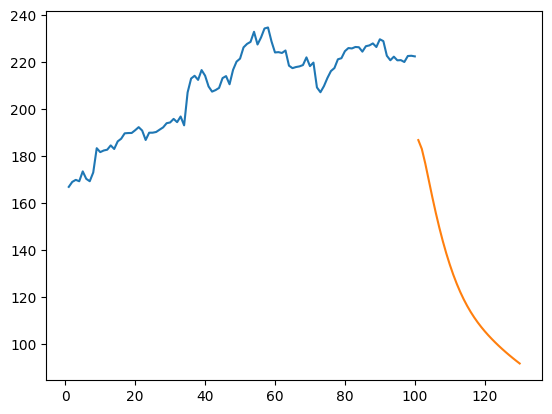

In [60]:
plt.plot(day_new,scaler.inverse_transform(df1[9980:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

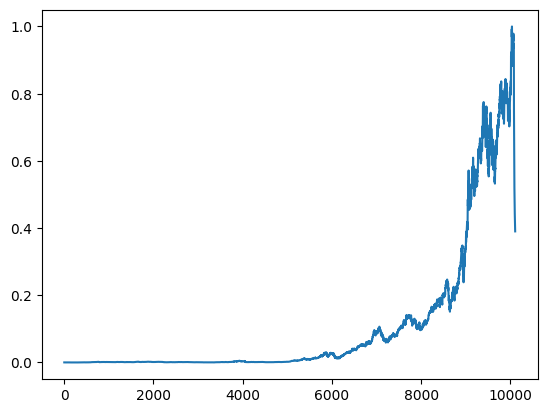

In [61]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[0:])

In [62]:
df3=scaler.inverse_transform(df3).tolist()

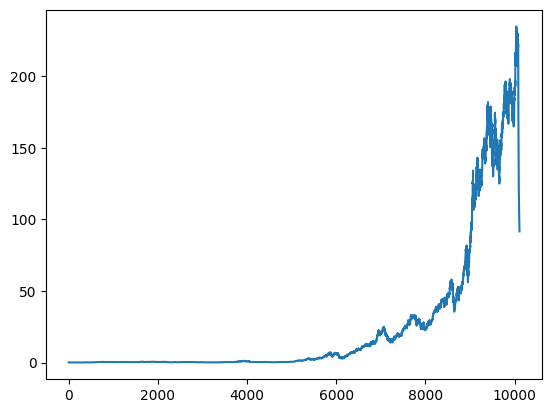

In [63]:
plt.plot(df3)

In [65]:
import joblib

# Assuming you have a trained model named `model`
# Save the model to a file
joblib.dump(model, 'Stock_Price_Predication.pkl')

print("Model saved successfully.")


Model saved successfully.
